# Tarefa 1 - Prática - Bloco 1
Baseado no notebook em que se aplicou a implementação da RNA Perceptron para determinar a classe da flor iris, você deve ajustar o mesmo algoritmo, no Google Colab, para a execução do dataset Bancario (disponível aqui no Moodle). Fazer testes com valores diferentes das amostras treinadas. Entregar um PDF no Notebook gerado com os devidos processamentos.

Obs: A entrega até a data limite será atribuída a nota integral com os descontos dos erros. A partir desta data será descontado 10% da nota no dia seguinte somado a 1% por dia de atraso, podendo ser entregue até a data final da Segunda Chamada. Contudo, parte da resolução do exercício será disponibilizada no dia posterior à data limite sem desconto.

In [21]:
# Importando dependencias

# SkLearn (Disponível em https://scikit-learn.org/stable/)
from sklearn import preprocessing
# Importa o módulo preprocessing que fornece funções para escalar, normalizar e padronizar dados.

from sklearn.model_selection import train_test_split
# Importa a função `train_test_split` que divide o conjunto de dados em conjuntos de treinamento e teste.

from sklearn.linear_model import Perceptron
# Importa o modelo Perceptron, um classificador linear muito utilizado para resolver problemas de classificação.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Importa métricas que serão usadas para avaliar o desempenho do modelo.
# `accuracy_score`: Avalia a precisão do modelo.
# `classification_report`: Fornece métricas como precisão, recall e f1-score por classe.
# `confusion_matrix`: Cria uma matriz de confusão para analisar a qualidade da classificação do modelo.

from sklearn import metrics
# Importa a biblioteca `metrics`, que possui funções adicionais para calcular outras métricas de desempenho dos modelos.

# Metaplot (Diponível em https://matplotlib.org/stable/index.html)
import matplotlib.pyplot as plt
# Importa a biblioteca `matplotlib.pyplot` e a apelida de `plt`.
# Esta é uma biblioteca de visualização que permite criar gráficos e plotar visualmente os dados e resultados do modelo.

# Numpy (Disponível em https://numpy.org/doc/)
import numpy as np
# Importa a biblioteca `numpy` e a apelida de `np`.
# `numpy` é uma biblioteca fundamental para a manipulação de arrays e operações matemáticas de forma eficiente.

# Pandas (Disponível em https://pandas.pydata.org/docs/)
import pandas as pd
# Importa a biblioteca `pandas` e a apelida de `pd`.
# `pandas` é usada para manipulação e análise de dados tabulares (em formato de dataframes).

# Random (Disponível em https://docs.python.org/3/library/random.html [Nota: a geração pela biblioteca são de números pseudo aleatórios])
import random
# Importa a biblioteca `random`, que é usada para gerar números pseudo-aleatórios.
# Ela pode ser útil para gerar amostras aleatórias ou definir sementes para replicabilidade.

In [22]:
# Tratamento dos dados

# Importando o dataframe para poder trabalhar
df = pd.read_csv("bancario.csv")
# Aqui estamos lendo um arquivo CSV chamado `bancario.csv` localizado no Google Drive.
# O método `pd.read_csv()` da biblioteca pandas é usado para importar os dados do CSV em um DataFrame.
# O DataFrame `df` armazena os dados em formato tabular, facilitando a manipulação e análise dos mesmos.

# Separa as classes
classificacao = df.iloc[0:21, 3].values
# Estamos extraindo uma parte específica dos dados:
# `df.iloc[0:21, 3]` indica que estamos acessando as linhas de 0 a 21 (ou seja, 21 primeiras linhas) e a quarta coluna (índice 3).
# `.values` transforma a série pandas em um array do NumPy.
# O objetivo aqui é separar os valores de classificação que serão usados como rótulos na modelagem do aprendizado de máquina.

# Normalizando a classificação das classes onde bom será 1 e mau será -1
classificacao_normalizada = np.where(classificacao == "bom", 1, -1)
# `np.where()` é uma função da biblioteca NumPy que serve para aplicar condições e retornar valores específicos.
# Neste caso, estamos substituindo os valores da variável `classificacao`.
# Onde o valor for `"bom"`, será substituído por `1`; e onde for diferente disso, será substituído por `-1` (ou seja, "mau").
# Isso é feito para normalizar os rótulos para o modelo, facilitando o uso no aprendizado supervisionado.

# Separando os dados que renda e dívida de cada conta, mas excluindo o número da conta
contas = df.iloc[0:21, [1, 2]].values
# Aqui estamos extraindo as colunas que contêm informações específicas de cada conta.
# `df.iloc[0:20, [1, 2]]` indica que estamos acessando as 20 primeiras linhas e apenas as colunas com índices 1 e 2.
# Normalmente, isso incluiria características importantes como "renda" e "dívida", que são usadas como atributos para treinar o modelo.
# `.values` transforma o resultado em um array do NumPy, que é uma estrutura mais apropriada para cálculos matemáticos.

In [23]:
# Normalização dos dados

escala = preprocessing.MinMaxScaler()
# `preprocessing.MinMaxScaler()` é uma função da biblioteca Scikit-Learn que realiza a normalização dos dados.
# A normalização é uma técnica que transforma os dados para que todos os valores estejam dentro de um mesmo intervalo (normalmente entre 0 e 1).
# Neste caso, `MinMaxScaler` é um método de escalonamento que transforma os dados para que o valor mínimo de cada característica seja 0 e o valor máximo seja 1.
# Isso é importante para evitar que características com valores grandes dominem as características com valores pequenos durante o treinamento do modelo de machine learning.

contas = escala.fit_transform(contas)
# Aqui, estamos aplicando o escalonamento nos dados da variável `contas`.
# `escala.fit_transform(contas)` realiza duas operações:
# - `fit()`: Calcula os parâmetros necessários (mínimo e máximo) para normalizar os dados, com base nos valores presentes em `contas`.
# - `transform()`: Aplica a transformação nos dados, normalizando os valores para o intervalo [0, 1].
# O resultado substitui a variável `contas`, transformando-a em dados normalizados.


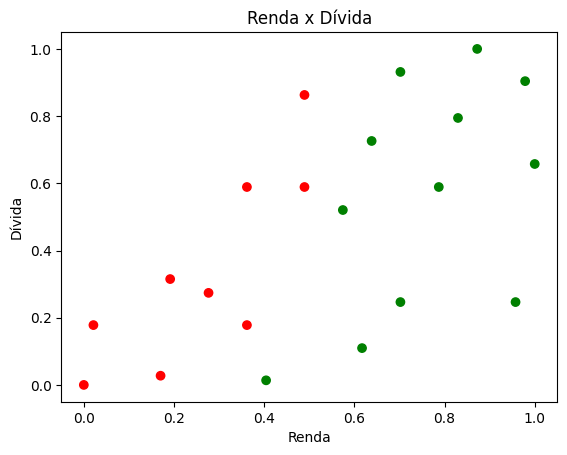

In [24]:
# Validando se as amostras são linearmente separáveis

# Definindo cores diferentes para garantir que seja possível visualmente detectar a lienaridade
cores = ['green' if c == 1 else 'red' for c in classificacao_normalizada]

plt.scatter(contas[:, 0], contas[:, 1], c=cores )
# `plt.scatter()` é uma função da biblioteca Matplotlib usada para criar um gráfico de dispersão (scatter plot).
# Estamos plotando os valores da primeira coluna (`contas[:, 0]`, que representa "Renda") contra os valores da segunda coluna (`contas[:, 1]`, que representa "Dívida").
# Cada ponto no gráfico representará uma observação, permitindo visualizar a relação entre renda e dívida.

plt.xlabel('Renda')
# `plt.xlabel('Renda')` adiciona um rótulo para o eixo X do gráfico.
# Aqui, o eixo X representa a "Renda" das contas, facilitando a compreensão dos dados no gráfico.

plt.ylabel('Dívida')
# `plt.ylabel('Dívida')` adiciona um rótulo para o eixo Y do gráfico.
# O eixo Y representa a "Dívida", o que nos ajuda a entender como os valores de dívida estão relacionados com a renda.

plt.title('Renda x Dívida')
# `plt.title('Renda x Dívida')` adiciona um título ao gráfico.
# O título descreve a visualização, indicando que estamos analisando a relação entre "Renda" e "Dívida".

plt.show()
# `plt.show()` exibe o gráfico gerado.
# Isso permite que vejamos a relação visual entre "Renda" e "Dívida" de forma gráfica, ajudando a validar se os dados parecem linearmente separáveis.

In [25]:
# Separação de 30% do dataset

# Usando a função `train_test_split()` para dividir os dados em conjuntos de treinamento e teste
# `contas` são os dados de entrada (características "Renda" e "Dívida")
# `classificacao_normalizada` são os rótulos das classes (-1 para "mau" e 1 para "bom")
# `test_size=0.3` indica que 30% dos dados serão usados para teste, e os 70% restantes para treinamento

contas_treinamento, contas_teste, classificacao_treinamento, classificacao_teste = train_test_split(
    contas,                      # Características (Renda e Dívida)
    classificacao_normalizada,   # Rótulos (Classificação como bom ou mau)
    test_size=0.3                # Percentual do dataset a ser usado para teste
)

# `contas_treinamento`: Dados de entrada (70%) que serão usados para treinar o modelo
# `contas_teste`: Dados de entrada (30%) que serão usados para testar o modelo
# `classificacao_treinamento`: Rótulos associados às contas do conjunto de treinamento
# `classificacao_teste`: Rótulos associados às contas do conjunto de teste

In [26]:
# Criando o Perceptron

# Criando uma instância do modelo Perceptron
# `eta0=0.0001`: Define a taxa de aprendizado inicial (learning rate), um valor pequeno para garantir um aprendizado mais estável.
# `alpha=0.1`: Define um parâmetro de regularização para evitar o overfitting (quanto maior o valor, maior a penalização de valores altos dos pesos).
p = Perceptron(eta0=0.1, alpha=0.1)

# Ajustando (treinando) o modelo Perceptron com os dados de treinamento
# `p.fit()` ajusta os parâmetros do modelo com base nos dados de entrada (`contas_treinamento`) e seus respectivos rótulos (`classificacao_treinamento`).
# Após o ajuste, o modelo estará pronto para fazer previsões com novos dados.
p.fit(contas_treinamento, classificacao_treinamento)

Perceptron(alpha=0.1, eta0=0.1)

In [27]:
# Validando com aquilo que foi treinado

# Fazendo a previsão para os dados de treinamento
# `p.predict(contas_treinamento)` faz previsões para cada uma das amostras presentes no conjunto de treinamento.
# O modelo usa os pesos ajustados para determinar se cada amostra é "bom" (1) ou "mau" (-1).
predicao_treino = p.predict(contas_treinamento)

# Calculando a acurácia dos dados de treinamento
# `accuracy_score(predicao_treino, classificacao_treinamento)` compara as previsões feitas pelo modelo (`predicao_treino`)
# com os rótulos reais (`classificacao_treinamento`) e retorna a proporção de previsões corretas (acurácia).
nota_do_treinamento = accuracy_score(predicao_treino, classificacao_treinamento)

# Exibindo a acurácia do modelo para os dados de treinamento
# A acurácia indica a porcentagem de previsões corretas feitas pelo modelo no conjunto de treinamento.
print("Acurácia dos dados de treinamento: ", nota_do_treinamento)


Acurácia dos dados de treinamento:  1.0


In [28]:
# Validando com o conjunto de testes

predicao_teste = p.predict(contas_teste)
nota_do_treinamento = accuracy_score(predicao_teste, classificacao_teste)
print("Acurácia dos dados de treinamento: ", nota_do_treinamento)

Acurácia dos dados de treinamento:  1.0


In [29]:
# Pegando informações do treinamento

# Exibindo o número de épocas que foram usadas durante o treinamento
# `p.n_iter_` armazena o número de iterações (ou épocas) que o Perceptron levou para convergir.
# Uma época é uma passagem completa pelos dados de treinamento durante o aprendizado.
# Esse valor é útil para entender o comportamento do treinamento e se o modelo precisou de muitas épocas para ajustar os pesos.
print("Número de épocas no treinamento: ", p.n_iter_)

# Exibindo a lista de parâmetros configurados no Perceptron
# `p.get_params()` retorna um dicionário com todos os parâmetros que foram configurados na instância do Perceptron.
# Esses parâmetros incluem valores como `eta0` (taxa de aprendizado), `alpha` (regularização), e `random_state`.
# Essa função é útil para revisar a configuração do modelo e garantir que todos os parâmetros estão como esperado.
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Número de épocas no treinamento:  11
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.1, 'class_weight': None, 'early_stopping': False, 'eta0': 0.1, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


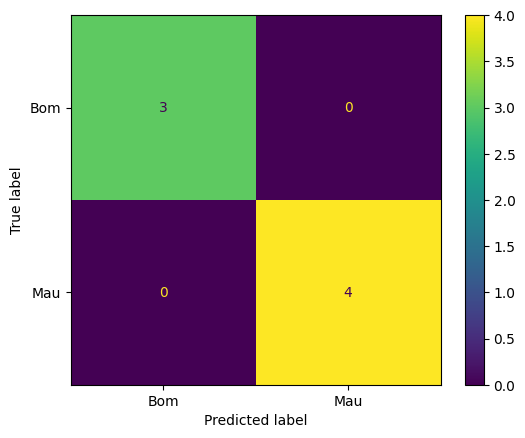

In [30]:
# Apresentação gráfica da matriz de confusão dos testes classificados

# Calculando a matriz de confusão para as previsões feitas no conjunto de teste
# `confusion_matrix(classificacao_teste, predicao_teste)` cria uma matriz de confusão comparando os rótulos verdadeiros (`classificacao_teste`)
# com as previsões feitas pelo modelo (`predicao_teste`).
# A matriz de confusão mostra a contagem de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
conf_matrix = confusion_matrix(classificacao_teste, predicao_teste)

# Criando um objeto de visualização da matriz de confusão
# `metrics.ConfusionMatrixDisplay()` é uma ferramenta da biblioteca sklearn que cria uma visualização gráfica da matriz de confusão.
# `confusion_matrix = conf_matrix` passa a matriz de confusão que calculamos.
# `display_labels = ['Bom', 'Mau']` define os rótulos a serem exibidos na matriz para facilitar a interpretação (classes "Bom" e "Mau").
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Bom', 'Mau'])

# Plotando a matriz de confusão
# `.plot()` cria o gráfico da matriz de confusão e exibe os valores.
cm_display.plot()

# Exibindo o gráfico gerado da matriz de confusão
# `plt.show()` mostra a visualização criada da matriz de confusão.
plt.show()